In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np


In [4]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q4-20231214T121639Z-001/Data_Q4/retail.csv'
retail_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
retail_data.head()


Transaction_id Product_id                          Description  Quantity  \
0         489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1         489434     79323P                   PINK CHERRY LIGHTS      12.0   
2         489434     79323W                  WHITE CHERRY LIGHTS      12.0   
3         489434      22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4         489434      21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

             Date  Price  Customer ID  
0  2009/12/1 7:45   6.95      13085.0  
1  2009/12/1 7:45   6.75      13085.0  
2  2009/12/1 7:45   6.75      13085.0  
3  2009/12/1 7:45   2.10      13085.0  
4  2009/12/1 7:45   1.25      13085.0

In [6]:
# Keep only the first 1,000,000 rows of the retail_data DataFrame
retail_data = retail_data.head(1000000)

In [7]:
retail_data

Transaction_id Product_id                          Description  \
0              489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1              489434     79323P                   PINK CHERRY LIGHTS   
2              489434     79323W                  WHITE CHERRY LIGHTS   
3              489434      22041         RECORD FRAME 7" SINGLE SIZE    
4              489434      21232       STRAWBERRY CERAMIC TRINKET BOX   
...               ...        ...                                  ...   
999995         576840      82582            AREA PATROLLED METAL SIGN   
999996         576840      82583                 HOT BATHS METAL SIGN   
999997         576840     82616B        FRAPPUCINO SCARF KNITTING KIT   
999998         576840     82616C  MIDNIGHT GLAMOUR SCARF KNITTING KIT   
999999         576840     84032A   CHARLIE+LOLA PINK HOT WATER BOTTLE   

        Quantity              Date  Price  Customer ID  
0           12.0    2009/12/1 7:45   6.95      13085.0  
1           12.0    2009/12/1 7:45   6.75      13085.0  
2           12.0    2009/12/1 7:45   6.75      13085.0  
3           48.0    2009/12/1 7:45   2.10      13085.0  
4           24.0    2009/12/1 7:45   1.25      13085.0  
...          ...               ...    ...          ...  
999995       2.0  2011/11/16 15:23   4.13          NaN  
999996       1.0  2011/11/16 15:23   4.13          NaN  
999997       2.0  2011/11/16 15:23   2.46          NaN  
999998       5.0  2011/11/16 15:23   2.46          NaN  
999999       3.0  2011/11/16 15:23   3.29          NaN  

[1000000 rows x 7 columns]

# Data Preprocessing

In [8]:
# Checking for missing values
missing_values = retail_data.isnull().sum()
missing_values


Transaction_id         0
Product_id             0
Description         4331
Quantity               0
Date                   0
Price                  0
Customer ID       225498
dtype: int64

In [10]:
# Converting 'Date' column to datetime format
retail_data['Date'] = pd.to_datetime(retail_data['Date'], errors='coerce')

# Checking for dates outside the range 2009-2011
date_out_of_range = retail_data[~retail_data['Date'].dt.year.isin([2009, 2010, 2011])]
date_out_of_range_count = date_out_of_range.shape[0]

date_out_of_range_count, date_out_of_range.head()

<ipython-input-10-b650ca81ed6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Date'] = pd.to_datetime(retail_data['Date'], errors='coerce')


(0,
 Empty DataFrame
 Columns: [Transaction_id, Product_id, Description, Quantity, Date, Price, Customer ID]
 Index: [])

In [12]:
# Checking for negative values in 'Price' column
negative_prices = retail_data[retail_data['Price'] < 0]
negative_prices_count = negative_prices.shape[0]

# Converting negative values to positive by taking their absolute values
if negative_prices_count > 0:
    retail_data['Price'] = retail_data['Price'].abs()

negative_prices_count, retail_data[retail_data['Price'] < 0].shape[0]


<ipython-input-12-2c2aa9d386b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['Price'] = retail_data['Price'].abs()


(5, 0)

# Visualization




In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

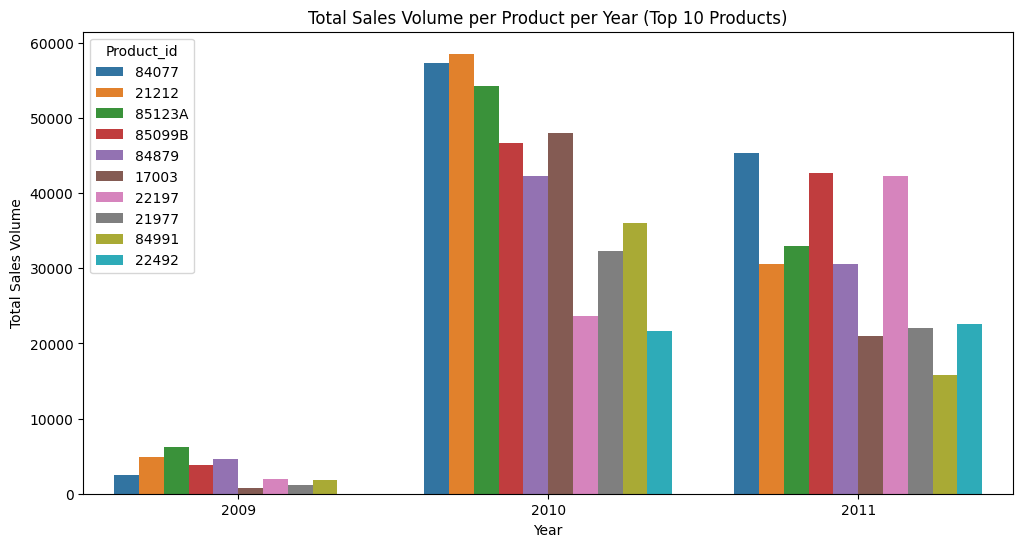

In [17]:
# Visualization 1: Total Sales Volume per Product per Year (Top 10 Products)
# Limiting the number of products for visualization
# Selecting top 10 products with the highest sales volume
top_products = sales_volume_per_product_year.groupby('Product_id').sum().nlargest(10)
top_product_ids = top_products.index.get_level_values(0)

# Filtering the data for these top products
filtered_sales_volume = sales_volume_per_product_year.loc[top_product_ids]

# Total sales volume per product per year for top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_sales_volume.index.get_level_values(1),
            y=filtered_sales_volume.values,
            hue=filtered_sales_volume.index.get_level_values(0))
plt.title('Total Sales Volume per Product per Year (Top 10 Products)')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.show()


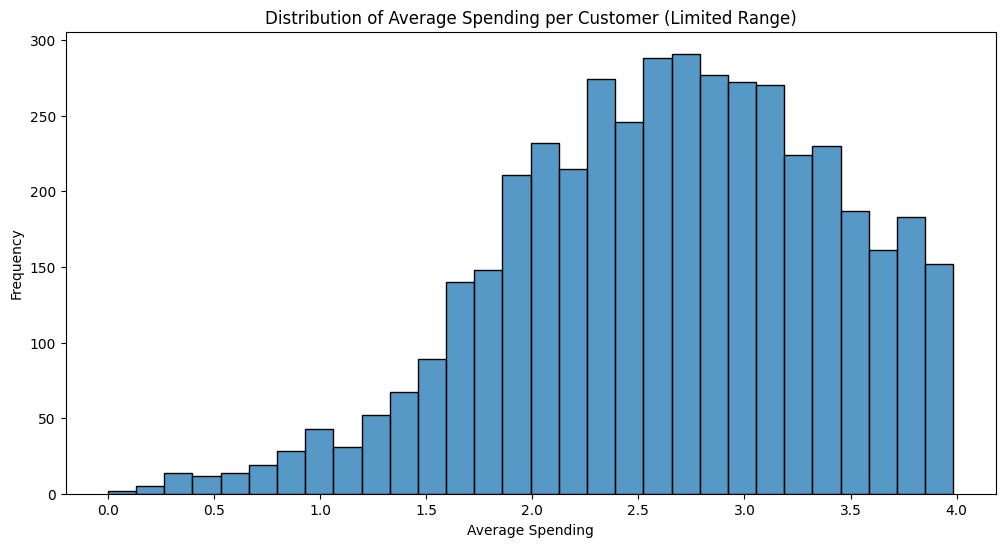

In [21]:
# Visualization 2: Average spending per customer
# Since there may be a wide range of average spendings, we will focus on a more common range
average_spending_description = average_spending_per_customer.describe()
average_spending_description

# Generating the histogram with a limited x-axis range
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(average_spending_per_customer, bins=30, ax=ax, binrange=(0, average_spending_description['75%']))
ax.set_title('Distribution of Average Spending per Customer (Limited Range)')
ax.set_xlabel('Average Spending')
ax.set_ylabel('Frequency')
plt.show()


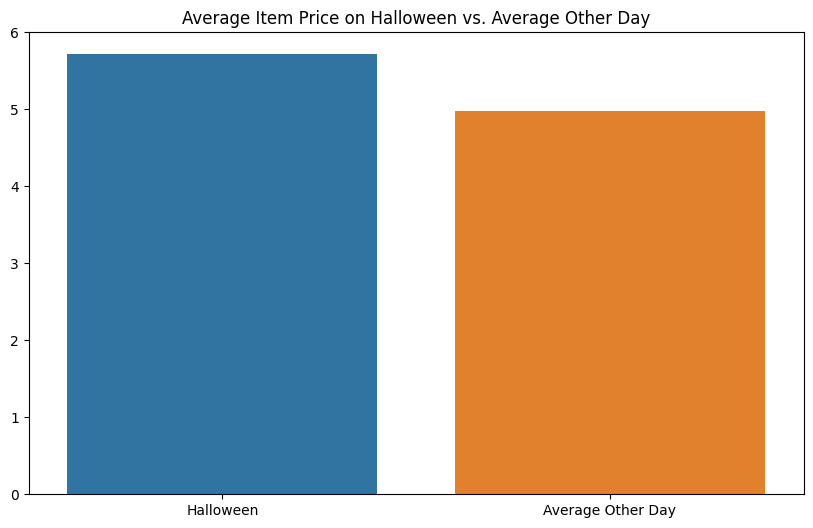

In [26]:
# Visualization 3: Comparing Average Item Price on Halloween vs. Average on Other Days
# This visualization aims to compare the average price of items sold on Halloween to that on other days.
# It helps to understand whether there is a significant difference in pricing on this specific holiday.

# Calculating average item price on Halloween
average_price_halloween = halloween_sales['Price'].mean()

# Calculating average item price on other days
average_price_other_days = other_days_sales['Price'].mean()

# Data for visualization
price_data = {'Average Price': [average_price_halloween, average_price_other_days],
              'Day': ['Halloween', 'Average Other Day']}

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Day', y='Average Price', data=price_data, ax=ax)
ax.set_title('Average Item Price on Halloween vs. Average Other Day')
plt.show()


<ipython-input-27-2b8b7fc4f8a2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_category = retail_data.groupby('Description').sum()['Price'].nlargest(10)


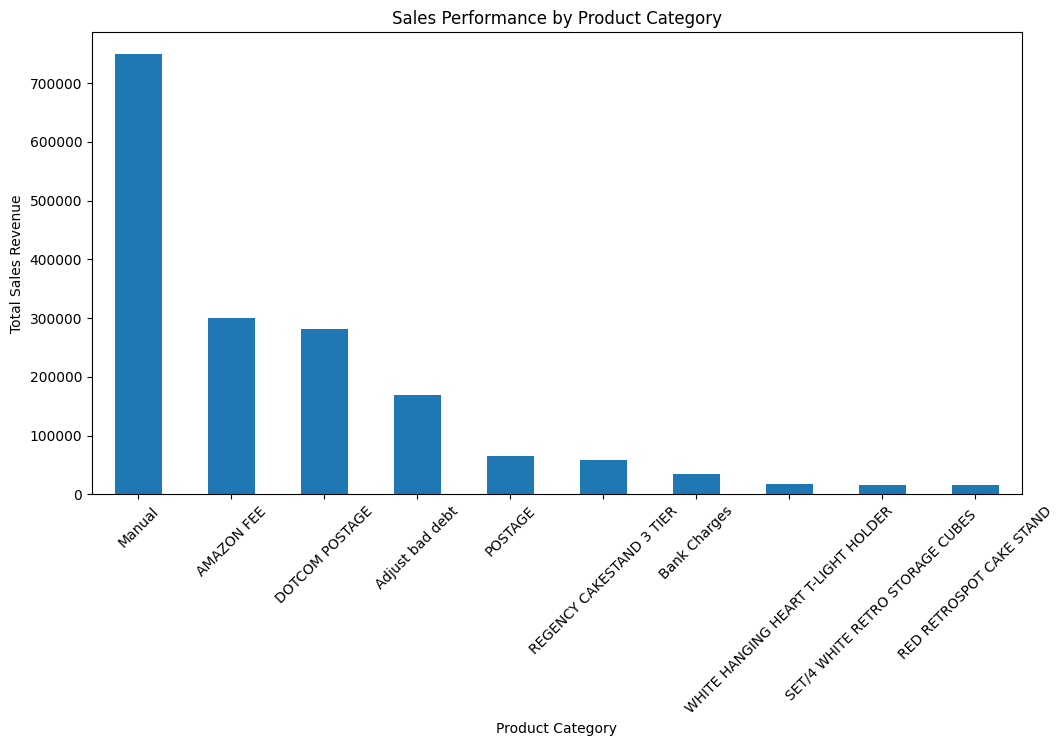

In [27]:
# Visualization 4: Sales Performance by Category
# This visualization highlights the sales performance of different product categories, which is crucial for understanding which categories are the most profitable or popular.

# Assuming 'Description' can be categorized into broader categories, here we'll use it directly for simplicity
sales_by_category = retail_data.groupby('Description').sum()['Price'].nlargest(10)

# Creating the bar plot for sales performance by category
fig, ax = plt.subplots(figsize=(12, 6))
sales_by_category.plot(kind='bar', ax=ax)
ax.set_title('Sales Performance by Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Sales Revenue')
plt.xticks(rotation=45)
plt.show()


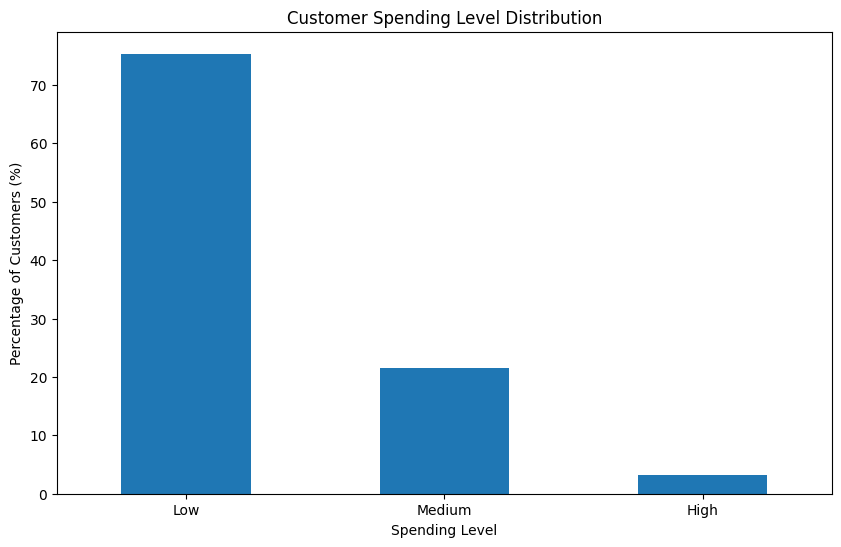

In [40]:
# Visualization 5: Customer Spending Level Distribution
# Ensuring all data is numeric
average_spending_per_customer = average_spending_per_customer.dropna()  # Dropping NaN values
average_spending_per_customer = average_spending_per_customer[average_spending_per_customer.apply(lambda x: isinstance(x, (int, float)))]

# Converting the Series to a DataFrame
average_spending_df = average_spending_per_customer.to_frame(name='Average Spending')

# Ensuring that bins are numeric
spending_bins = [0, 4, 10, np.inf]  # np.inf is a float representing infinity

# Categorizing customers into different spending levels
average_spending_df['Spending Level'] = pd.cut(average_spending_df['Average Spending'],
                                               bins=spending_bins,
                                               labels=spending_labels)

# Calculating the distribution of spending levels
spending_level_distribution = average_spending_df['Spending Level'].value_counts(normalize=True) * 100

# Creating the bar plot for spending level distribution
fig, ax = plt.subplots(figsize=(10, 6))
spending_level_distribution.plot(kind='bar', ax=ax)
ax.set_title('Customer Spending Level Distribution')
ax.set_xlabel('Spending Level')
ax.set_ylabel('Percentage of Customers (%)')
plt.xticks(rotation=0)
plt.show()


<ipython-input-41-adfa51c430d0>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_hour = retail_data.groupby('Hour').sum()['Price']


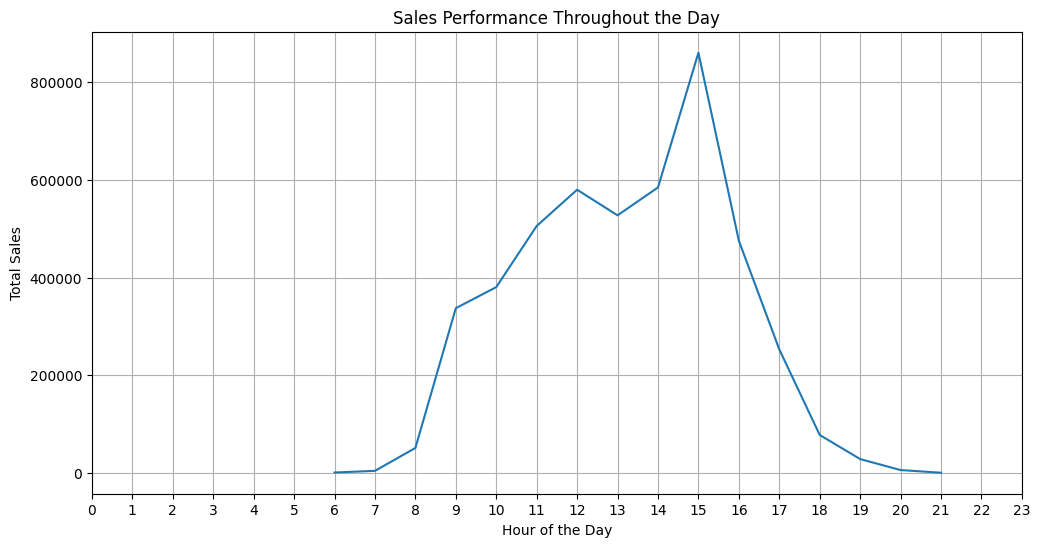

In [41]:
# Visualization 6: Sales Performance Throughout the Day
# Reloading the data since the environment was reset
retail_data = pd.read_csv(file_path)

# Ensuring 'Date' is in datetime format and creating an 'Hour' column
retail_data['Date'] = pd.to_datetime(retail_data['Date'])
retail_data['Hour'] = retail_data['Date'].dt.hour

# Grouping data by hour and calculating total sales for each hour
sales_by_hour = retail_data.groupby('Hour').sum()['Price']

# Visualization: Sales Performance Throughout the Day
# This visualization shows the variation in sales volume throughout different hours of the day.

# Creating the line plot for sales by hour
fig, ax = plt.subplots(figsize=(12, 6))
sales_by_hour.plot(kind='line', ax=ax)
ax.set_title('Sales Performance Throughout the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(visible=True)
plt.show()


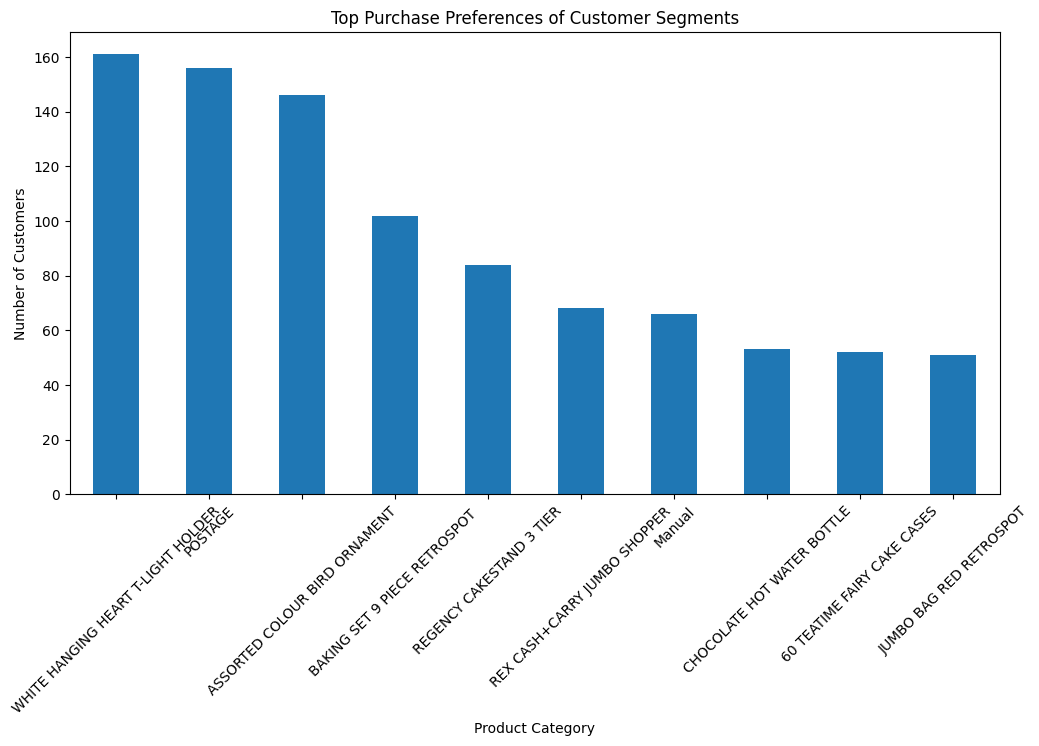

In [43]:
# Visualization 7: Customer Segments' Purchase Preferences
# This visualization aims to analyze the purchase preferences of different customer segments based on their most frequently bought product categories.

# First, we create a new dataframe that associates customers with product categories
customer_product_preferences = retail_data.groupby(['Customer ID', 'Description']).count()['Quantity'].reset_index()

# Then, we find the most frequently bought category for each customer
customer_product_preferences['Rank'] = customer_product_preferences.groupby('Customer ID')['Quantity'].rank(method='first', ascending=False)
top_customer_preferences = customer_product_preferences[customer_product_preferences['Rank'] == 1]

# Grouping the top preferences by product category to see the overall preference trends
preference_trends = top_customer_preferences['Description'].value_counts()

# Creating the bar plot for customer segments' purchase preferences
fig, ax = plt.subplots(figsize=(12, 6))
preference_trends.head(10).plot(kind='bar', ax=ax)  # Displaying top 10 preferences for readability
ax.set_title('Top Purchase Preferences of Customer Segments')
ax.set_xlabel('Product Category')
ax.set_ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


<ipython-input-44-661484cf3bee>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_month = retail_data.groupby('Month').sum()['Quantity']


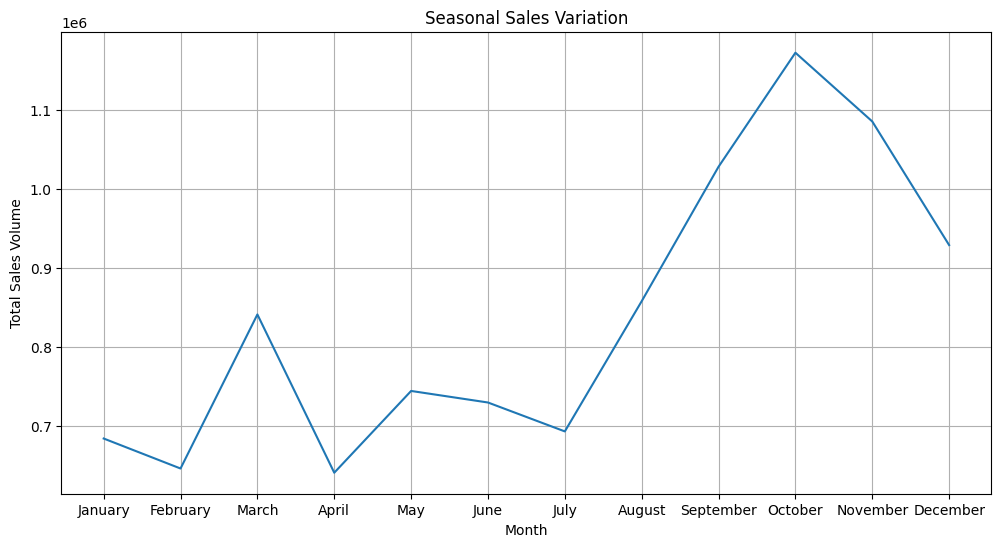

In [44]:
# Visualization 8: Seasonal Sales Variation
# This visualization aims to analyze the variation in product sales across different months of the year,
# highlighting potential seasonal trends.

# Converting 'Date' to datetime and extracting month
retail_data['Month'] = retail_data['Date'].dt.month

# Grouping data by month and calculating total sales for each month
sales_by_month = retail_data.groupby('Month').sum()['Quantity']

# Creating the line plot for seasonal sales variation
fig, ax = plt.subplots(figsize=(12, 6))
sales_by_month.plot(kind='line', ax=ax)
ax.set_title('Seasonal Sales Variation')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales Volume')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(visible=True)
plt.show()


<ipython-input-45-985576c69693>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_weekday = retail_data.groupby('Weekday Name').sum()['Price']


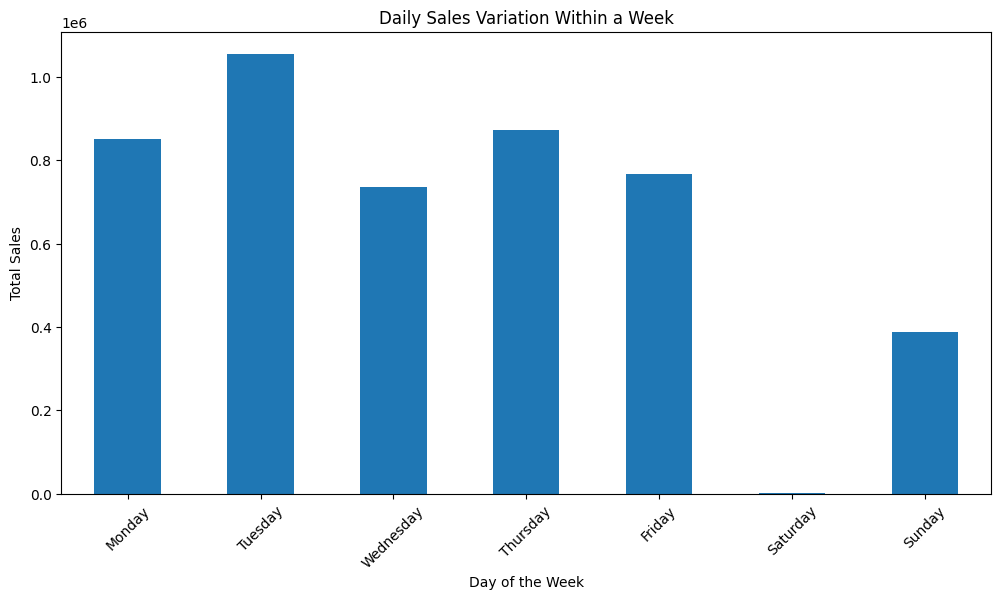

In [45]:
# Visualization 9: Daily Sales Variation Within a Week
# This visualization aims to analyze the sales variation across different days of the week,
# highlighting daily operational trends.

# Extracting day of week from 'Date' and mapping it to weekday names
retail_data['Weekday'] = retail_data['Date'].dt.dayofweek
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
retail_data['Weekday Name'] = retail_data['Weekday'].map(day_names)

# Grouping data by weekday and calculating total sales for each day
sales_by_weekday = retail_data.groupby('Weekday Name').sum()['Price']

# Creating the bar plot for daily sales variation within a week
fig, ax = plt.subplots(figsize=(12, 6))
sales_by_weekday.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', ax=ax)
ax.set_title('Daily Sales Variation Within a Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


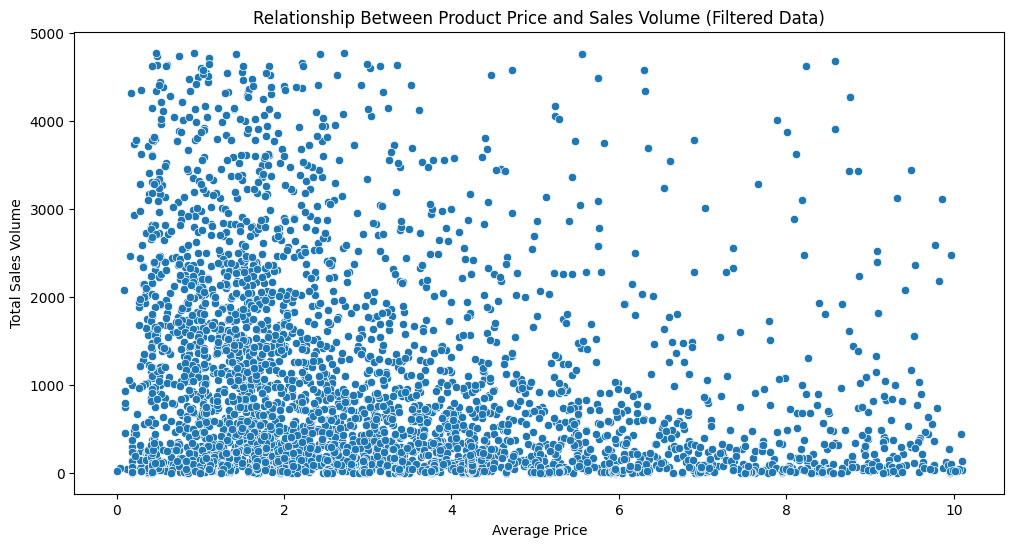

In [50]:
# Visualization 10: Relationship Between Product Price and Sales Volume (Filtered Data)
# Cleaning data: Removing negative values for Price and Quantity
retail_data = retail_data[(retail_data['Price'] > 0) & (retail_data['Quantity'] > 0)]

# Calculating average price and total sales volume for each product
product_sales = retail_data.groupby('Product_id').agg({'Price': 'mean', 'Quantity': 'sum'}).reset_index()

# Removing outliers in 'Price' and 'Quantity' to improve visualization
# Using the Interquartile Range (IQR) method to filter out extreme values
Q1_price, Q3_price = product_sales['Price'].quantile([0.25, 0.75])
IQR_price = Q3_price - Q1_price
price_filter = (product_sales['Price'] >= (Q1_price - 1.5 * IQR_price)) & (product_sales['Price'] <= (Q3_price + 1.5 * IQR_price))

Q1_quantity, Q3_quantity = product_sales['Quantity'].quantile([0.25, 0.75])
IQR_quantity = Q3_quantity - Q1_quantity
quantity_filter = (product_sales['Quantity'] >= (Q1_quantity - 1.5 * IQR_quantity)) & (product_sales['Quantity'] <= (Q3_quantity + 1.5 * IQR_quantity))

filtered_product_sales = product_sales[price_filter & quantity_filter]

# Visualization code
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='Price', y='Quantity', data=filtered_product_sales, ax=ax)
ax.set_title('Relationship Between Product Price and Sales Volume (Filtered Data)')
ax.set_xlabel('Average Price')
ax.set_ylabel('Total Sales Volume')
plt.show()

# Association Rule Analysis


Association Rule Analysis is a data mining technique used to discover relationships and patterns in datasets. It identifies associations between items, transactions, or events, typically in market basket analysis and recommendation systems. The process involves finding frequent itemsets and generating rules based on support and confidence measures. These rules help in decision-making, marketing strategies, and personalized recommendations.

In [51]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Aprior

In [52]:
# Assuming the preprocessed data is already loaded into 'retail_data'
# and 'retail_data' contains a column 'Transaction_id' and 'Description'

# Step 1: Convert the dataset into a list of transactions
# Each transaction is a list of items purchased together
transactions = retail_data.groupby('Transaction_id')['Description'].apply(list).values.tolist()

# Step 2: Apply Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Displaying the first few rules
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents  \
0             (REGENCY CAKESTAND 3 TIER)   
1               (6 RIBBONS RUSTIC CHARM)   
2               (6 RIBBONS RUSTIC CHARM)   
3  (SET OF 20 VINTAGE CHRISTMAS NAPKINS)   
4      (60 CAKE CASES VINTAGE CHRISTMAS)   

                             consequents  antecedent support  \
0               (6 RIBBONS RUSTIC CHARM)            0.099156   
1             (REGENCY CAKESTAND 3 TIER)            0.044169   
2   (WHITE HANGING HEART T-LIGHT HOLDER)            0.044169   
3      (60 CAKE CASES VINTAGE CHRISTMAS)            0.024908   
4  (SET OF 20 VINTAGE CHRISTMAS NAPKINS)            0.023562   

   consequent support   support  confidence       lift  leverage  conviction  \
0            0.044169  0.011398    0.114955   2.602620  0.007019    1.079980   
1            0.099156  0.011398    0.258065   2.602620  0.007019    1.214181   
2            0.139024  0.012348    0.279570   2.010951  0.006208    1.195086   
3            0.023562  0.011266    0.452331  19.197454  0.010680    1.782896   
4            0.024908  0.011266    0.478163  19.197454  0.010680    1.868578   

   zhangs_metric  
0       0.683550  
1       0.644227  
2       0.525954  
3       0.972123  
4       0.970783

In [53]:
# Storing the rules DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q4-20231214T121639Z-001/Data_Q4/association_rules.csv'
rules.to_csv(output_file_path, index=False)

output_file_path


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q4-20231214T121639Z-001/Data_Q4/association_rules.csv'

## FP-tree

In [54]:
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# Step 1: Convert the dataset into a list of transactions (as before)
# Step 2: Apply Transaction Encoder (as before)
# Using the already prepared 'df' DataFrame for FP-Growth

# Step 3: Find frequent itemsets using FP-Growth algorithm
frequent_itemsets_fp = fpgrowth(df, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.1)

# Displaying the first few rules generated by FP-Growth
rules_fp.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                           consequents  \
0      (STRAWBERRY CERAMIC TRINKET BOX)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1  (WHITE HANGING HEART T-LIGHT HOLDER)      (STRAWBERRY CERAMIC TRINKET BOX)   
2      (STRAWBERRY CERAMIC TRINKET BOX)                       (PARTY BUNTING)   
3                       (PARTY BUNTING)      (STRAWBERRY CERAMIC TRINKET BOX)   
4            (REGENCY CAKESTAND 3 TIER)      (STRAWBERRY CERAMIC TRINKET BOX)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.060923            0.139024  0.019129    0.313989  2.258526   
1            0.139024            0.060923  0.019129    0.137597  2.258526   
2            0.060923            0.068707  0.010000    0.164140  2.388985   
3            0.068707            0.060923  0.010000    0.145545  2.388985   
4            0.099156            0.060923  0.012718    0.128260  2.105259   

   leverage  conviction  zhangs_metric  
0  0.010659    1.255047       0.593384  
1  0.010659    1.088907       0.647211  
2  0.005814    1.114174       0.619132  
3  0.005814    1.099036       0.624307  
4  0.006677    1.077243       0.582786

In [56]:
# Storing the rules DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q4-20231214T121639Z-001/Data_Q4/association_rules_fp.csv'
rules.to_csv(output_file_path, index=False)

output_file_path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content/drive/MyDrive/Colab Notebooks/notebook/5002 final/Data_Q4-20231214T121639Z-001/Data_Q4/association_rules_fp.csv'